Use the Notebook to build the code to scrape the following Wikipedia page,

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:


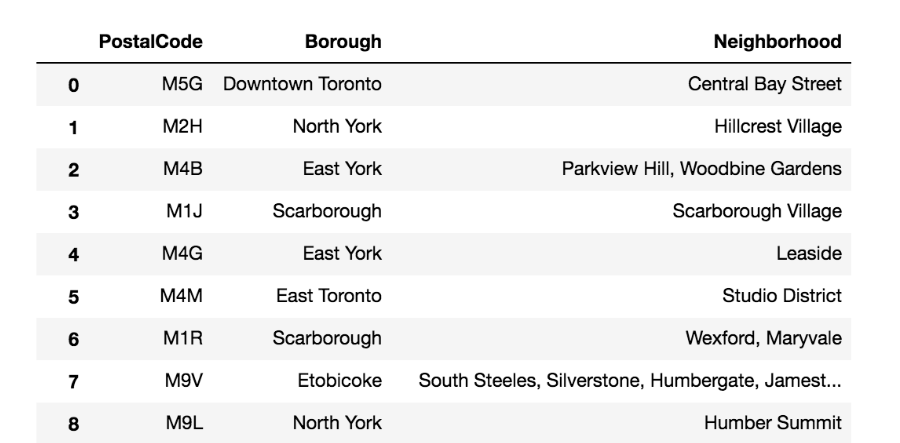

#### To create the above dataframe:

we first import, Python Frameworks and Libraries for Web Scraping

Scrapy is an open source web scraping framework written in Python which takes care of everything from downloading HTML if web pages to storing them in the form you want

In [1]:
pip install Scrapy


  Using cached https://files.pythonhosted.org/packages/52/50/bb4cefca37da63a0c52218ba2cb1b1c36110d84dcbae8aa48cd67c5e95c2/pyasn1_modules-0.2.7-py2.py3-none-any.whl
  Created wheel for protego: filename=Protego-0.1.16-cp37-none-any.whl size=7770 sha256=67983ac8b84a810677ce3d58ff58d5ab2450caaeb5a55ace137c429b2bedfb3f
  Stored in directory: C:\Users\jonathan\AppData\Local\pip\Cache\wheels\51\01\d1\4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp37-none-any.whl size=12551 sha256=cbb2d7aaee91ee0ea3d670d4c9fb744f1c356d809b5affa482d945b9c4922bba
  Stored in directory: C:\Users\jonathan\AppData\Local\pip\Cache\wheels\88\99\96\cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego PyDispatcher
Note: you may need to restart the kernel to use updated packages.


urllib is a package with several modules for working with URLs (Uniform Resource Locators).

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


Selenium is a tool that automates browsers based on Java. But you can access it via the Python Package Selenium.

In [3]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


Beautiful Soup (BS4) is a parsing library that can use different parsers.

In [4]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


#### import libraries

In [20]:
#imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [21]:
#get html from wikipedia 
html = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(html.text, 'lxml')

In [22]:

#using soup object, iterate the .wikitable to get the data from the HTML page and store it into a list
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
    for td in tr.find_all(['th','td']):
        section.append(td.text.rstrip())
    
    #First row of data is the header
    if (index == 0):
        columns = section
    else:
        data.append(section)



In [23]:
#convert list into Pandas DataFrame
toronto_df = pd.DataFrame(data = data,columns = columns)
toronto_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### Clean not assigned Neighbourhood

In [24]:
toronto_df = toronto_df[canada_df['Borough'] != 'Not assigned']
toronto_df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [25]:
toronto_df = toronto_df[canada_df['Neighbourhood'] != 'Not assigned']
toronto_df.head()

C:\Users\jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [26]:
toronto_df.to_csv('toronto_part1.csv')
toronto_df.head(14)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
9,M9A,Downtown Toronto,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North
14,M4B,East York,Woodbine Gardens


In [27]:
toronto_df.shape

(209, 3)

#### Add Geospatial Data

In [29]:
#Get data lat/long data from csv
geospatial  = pd.read_csv("Geospatial_Coordinates.csv")

In [30]:
geospatial.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [31]:
#### join tables

In [32]:
toronto_df = toronto_df.join(geospatial)
toronto_df.head(11)

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
2,M3A,North York,Parkwoods,M1E,43.763573,-79.188711
3,M4A,North York,Victoria Village,M1G,43.770992,-79.216917
4,M5A,Downtown Toronto,Harbourfront,M1H,43.773136,-79.239476
5,M6A,North York,Lawrence Heights,M1J,43.744734,-79.239476
6,M6A,North York,Lawrence Manor,M1K,43.727929,-79.262029
9,M9A,Downtown Toronto,Queen's Park,M1N,43.692657,-79.264848
10,M1B,Scarborough,Rouge,M1P,43.757410,-79.273304
11,M1B,Scarborough,Malvern,M1R,43.750072,-79.295849
13,M3B,North York,Don Mills North,M1T,43.781638,-79.304302
14,M4B,East York,Woodbine Gardens,M1V,43.815252,-79.284577


### Maps

In [40]:
CLIENT_ID = 'ILSDIMGM4OOZ241Lyyyyyyyyyyyyyyyyyyyyyy0MIE0' # your Foursquare ID
CLIENT_SECRET = 'NPY1CyyyyyyyyyyyyyyyyyyyyyyyyyyyFGFCUEPOQ3E1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ILSDIMGM4OOZ241LFUQRHHWYT2EDSOYSE4ZVNKIIVPT0MIE0
CLIENT_SECRET:NPY1CCT3NZTR1255TZE3DOSXKSNITRI5AFGFCURFEPOQ3E1J


In [39]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [42]:
#Filter Canada data to only use boroughs in Toronto
toronto = toronto_df[canada_df['Borough'].str.contains('Toronto')]
toronto.head()

C:\Users\jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
4,M5A,Downtown Toronto,Harbourfront,M1H,43.773136,-79.239476
9,M9A,Downtown Toronto,Queen's Park,M1N,43.692657,-79.264848
16,M5B,Downtown Toronto,Ryerson,M1X,43.836125,-79.205636
17,M5B,Downtown Toronto,Garden District,M2H,43.803762,-79.363452
33,M5C,Downtown Toronto,St. James Town,M3N,43.761631,-79.520999


In [83]:
toronto_df.dropna()


,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
2,M3A,North York,Parkwoods,M1E,43.763573,-79.188711
3,M4A,North York,Victoria Village,M1G,43.770992,-79.216917
4,M5A,Downtown Toronto,Harbourfront,M1H,43.773136,-79.239476
5,M6A,North York,Lawrence Heights,M1J,43.744734,-79.239476
6,M6A,North York,Lawrence Manor,M1K,43.727929,-79.262029
9,M9A,Downtown Toronto,Queen's Park,M1N,43.692657,-79.264848
10,M1B,Scarborough,Rouge,M1P,43.757410,-79.273304
11,M1B,Scarborough,Malvern,M1R,43.750072,-79.295849
13,M3B,North York,Don Mills North,M1T,43.781638,-79.304302
14,M4B,East York,Woodbine Gardens,M1V,43.815252,-79.284577


In [85]:
toronto_df.isna().sum()

Postcode           0
Borough            0
Neighbourhood      0
Postal Code      132
Latitude         132
Longitude        132
dtype: int64

In [86]:
toronto_df = toronto_df.dropna()

In [88]:
toronto_df.isna().sum()

Postcode         0
Borough          0
Neighbourhood    0
Postal Code      0
Latitude         0
Longitude        0
dtype: int64

Generating map

In [124]:
#Show an initial map of the neighborhoods in Toronto
map_toronto = folium.Map(location=[toronto_df["Latitude"][5], toronto_df["Longitude"][6]], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df["Latitude"], toronto_df["Longitude"], toronto_df["Borough"], toronto_df["Neighbourhood"]):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Explore First Neighborhood

In [104]:
#Get data of first neighborhood
neighborhood_latitude = toronto_df['Latitude'][5] # neighborhood latitude value
neighborhood_longitude = toronto_df['Longitude'][6] # neighborhood longitude value

neighborhood_name = toronto_df['Neighbourhood'][2] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7447342, -79.26202940000002.


In [105]:
# Setup API URL to explore venues near by
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
neighborhood_json = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = neighborhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Fusion Tech,Other Repair Shop,43.744563,-79.262734
1,Jin Jin Holistic Centre,Spa,43.741895,-79.260778
2,Thai Flavour,Thai Restaurant,43.741830,-79.260710


### Generalize Venue Data Collection


In [106]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get Venue Data from Foursquare for all neighborhoods


In [107]:
#Get all Tor
toronto_venues_df = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront
Lawrence Heights
Lawrence Manor
Queen's Park
Rouge
Malvern
Don Mills North
Woodbine Gardens
Parkview Hill
Ryerson
Garden District
Glencairn
Cloverdale
Islington
Martin Grove
Princess Gardens
West Deane Park
Highland Creek
Rouge Hill
Port Union
Flemingdon Park
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens
Eringate
Markland Wood
Old Burnhamthorpe
Guildwood
Morningside
West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
Downsview North
Wilson Heights
Thorncliffe Park
Adelaide
King
Richmond
Dovercourt Village
Dufferin
Scarborough Village
Fairview
Henry Farm
Oriole
Northwood Park
York University
East Toronto
Harbourfront East
Toronto Islands
Union Station
Little Portugal
Trinity
East Birchmount Park
Ionview
Kennedy Park
Bayview Village
CFB Toronto
Downsview East
The Danforth West
Riverdale
Design Exchange
Toronto Dominion Cent

In [108]:
print(toronto_venues_df.shape)
toronto_venues_df.head()

(1587, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
1,Parkwoods,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
2,Parkwoods,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
3,Parkwoods,43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
4,Parkwoods,43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center


In [109]:
toronto_venues_df.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,90,90,90,90,90,90
Bathurst Manor,2,2,2,2,2,2
Berczy Park,32,32,32,32,32,32
Bloordale Gardens,4,4,4,4,4,4
Brockton,4,4,4,4,4,4
Caledonia-Fairbanks,2,2,2,2,2,2
Cedarbrae,100,100,100,100,100,100
Central Bay Street,56,56,56,56,56,56
Christie,85,85,85,85,85,85


In [110]:
print('There are {} uniques categories.'.format(len(toronto_venues_df['Venue Category'].unique())))


There are 242 uniques categories.


### Analyze Neighborhoods

In [111]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,

In [112]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Adelaide,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.033333,0.000000,0.044444,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111,0.00,0.011111,0.00,0.011111,0.011111,0.00,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.022222,0.00,0.011111,0.055556,0.0

In [113]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                 venue  freq
0                 Café  0.06
1   Chinese Restaurant  0.06
2  Dumpling Restaurant  0.04
3                  Bar  0.04
4          Coffee Shop  0.04


----Bathurst Manor----
               venue  freq
0             Garden   0.5
1     Ice Cream Shop   0.5
2        Yoga Studio   0.0
3  Mobile Phone Shop   0.0
4     Lingerie Store   0.0


----Berczy Park----
            venue  freq
0     Pizza Place  0.12
1  Sandwich Place  0.09
2    Dessert Shop  0.09
3             Gym  0.06
4     Coffee Shop  0.06


----Bloordale Gardens----
                venue  freq
0   Health Food Store  0.25
1                 Pub  0.25
2               Trail  0.25
3         Men's Store  0.00
4  Miscellaneous Shop  0.00


----Brockton----
               venue  freq
0               Park  0.25
1  Mobile Phone Shop  0.25
2        Pizza Place  0.25
3           Bus Line  0.25
4       Liquor Store  0.00


----Caledonia-Fairbanks----
            venue  freq
0    Tennis Court   0.5
1

4                Hotel  0.03


----Riverdale----
                        venue  freq
0  Construction & Landscaping   0.5
1              Baseball Field   0.5
2                 Yoga Studio   0.0
3  Modern European Restaurant   0.0
4                Liquor Store   0.0


----Rouge----
                   venue  freq
0      Indian Restaurant  0.33
1              Pet Store  0.17
2  Vietnamese Restaurant  0.17
3                Brewery  0.17
4     Chinese Restaurant  0.17


----Rouge Hill----
                  venue  freq
0      Asian Restaurant  0.09
1                   Gym  0.09
2            Beer Store  0.09
3           Coffee Shop  0.09
4  Fast Food Restaurant  0.05


----Scarborough Village----
           venue  freq
0  Grocery Store  0.18
1           Café  0.18
2           Park  0.12
3      Nightclub  0.06
4          Diner  0.06


----St. James Town----
                venue  freq
0                 Gym  0.17
1  Athletics & Sports  0.17
2      Discount Store  0.17
3        Liquor Store  0.17

In [114]:
#method to sort venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [115]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Chinese Restaurant,Café,Vietnamese Restaurant,Coffee Shop,Dumpling Restaurant,Bar,Bakery,Mexican Restaurant,Vegetarian / Vegan Restaurant,Cocktail Bar
1,Bathurst Manor,Garden,Ice Cream Shop,Women's Store,Dance Studio,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
2,Berczy Park,Pizza Place,Dessert Shop,Sandwich Place,Coffee Shop,Sushi Restaurant,Café,Gym,Italian Restaurant,Park,Pharmacy
3,Bloordale Gardens,Pub,Trail,Health Food Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Cuban Restaurant
4,Brockton,Park,Bus Line,Pizza Place,Mobile Phone Shop,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner


### Cluster Neighborhoods

In [116]:
# set number of clusters
kclusters = int(len(toronto_df["Neighbourhood"].unique()) / 4)
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df.copy()
toronto_merged.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M3A,North York,Parkwoods,M1E,43.763573,-79.188711,8.0,Mexican Restaurant,Electronics Store,Intersection,Pizza Place,Breakfast Spot,Medical Center,Rental Car Location,Dance Studio,Doner Restaurant,Dog Run
3,M4A,North York,Victoria Village,M1G,43.770992,-79.216917,17.0,Coffee Shop,Korean Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Discount Store
4,M5A,Downtown Toronto,Harbourfront,M1H,43.773136,-79.239476,8.0,Athletics & Sports,Bakery,Bank,Fried Chicken Joint,Lounge,Hakka Restaurant,Gas Station,Thai Restaurant,Caribbean Restaurant,Diner
5,M6A,North York,Lawrence Heights,M1J,43.744734,-79.239476,10.0,Playground,Convenience Store,Women's Store,Cupcake Shop,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Discount Store
6,M6A,North York,Lawrence Manor,M1K,43.727929,-79.262029,14.0,Discount Store,Coffee Shop,Department Store,Golf Course,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run


In [126]:
# create map
map_clusters = folium.Map(location=[toronto_df["Latitude"][5], toronto_df["Longitude"][6]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7).add_to(map_clusters)
    
       
map_clusters